### Medical Charges predict using Linear Regression
Ahmad Sotoude <br>
<a href="https://github.com/ahmadeshanam">link to github</a>

importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

you can download the dataset from kaggle: <a href="https://www.kaggle.com/datasets/mirichoi0218/insurance">link</a><br>
importing data set:

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


understanding data:

In [3]:
print('num of rows: ', df.shape[0])
print('num of cols: ', df.shape[1])

num of rows:  1338
num of cols:  7


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()
print('\n\nNull values:')
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Null values:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

no null values :)<br>
EDA<br>
plotting and understanding the data

In [6]:
df.drop(labels=['region','children'], axis='columns', inplace=True)
df.head()

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520


Binerizing smoker and sex columns:

In [7]:
df.loc[df['smoker']=='yes', 'smoker'] = 1
df.loc[df['smoker']=='no', 'smoker'] = 0

df.loc[df['sex']=='male', 'sex'] = 1
df.loc[df['sex']=='female', 'sex'] = 0

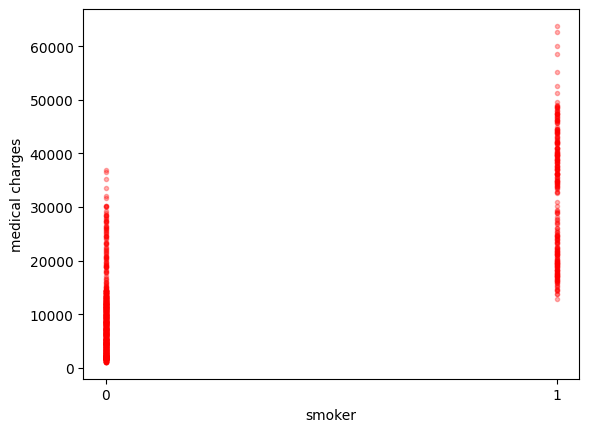

In [8]:
plt.plot(df['smoker'],df['charges'],'r.', alpha= 0.3)
plt.xticks(np.arange(0, 2, step=1))
plt.xlabel('smoker')
plt.ylabel('medical charges')
plt.show()

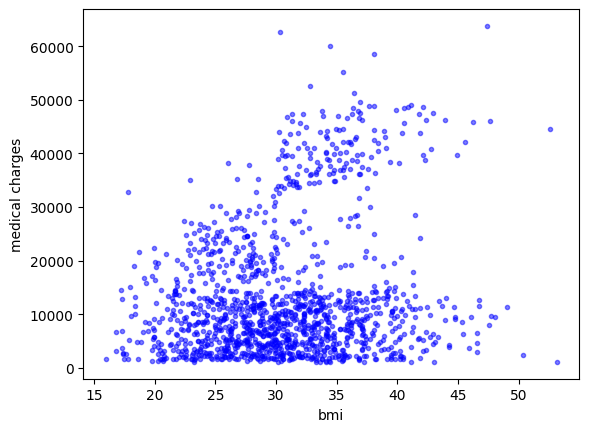

In [9]:
plt.plot(df['bmi'],df['charges'],'b.', alpha=0.5)
plt.xlabel('bmi')
plt.ylabel("medical charges")
plt.show()

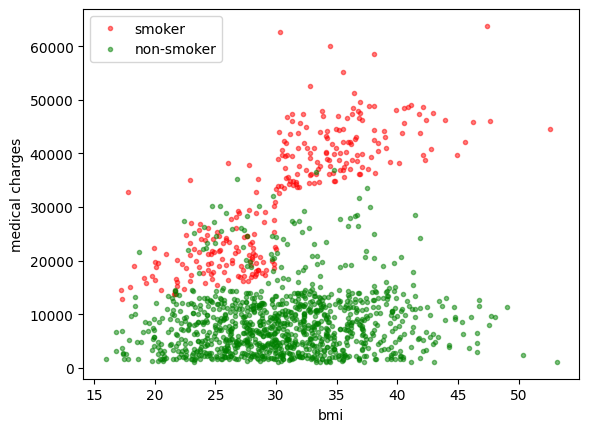

In [10]:
smkrs =  df[df['smoker']==1]
nonsmkrs= df[df['smoker']==0]
plt.plot(smkrs['bmi'],smkrs['charges'],'r.', label='smoker',alpha=0.5)
plt.plot(nonsmkrs['bmi'],nonsmkrs['charges'],'g.',label='non-smoker', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('bmi')
plt.ylabel("medical charges")
plt.show()

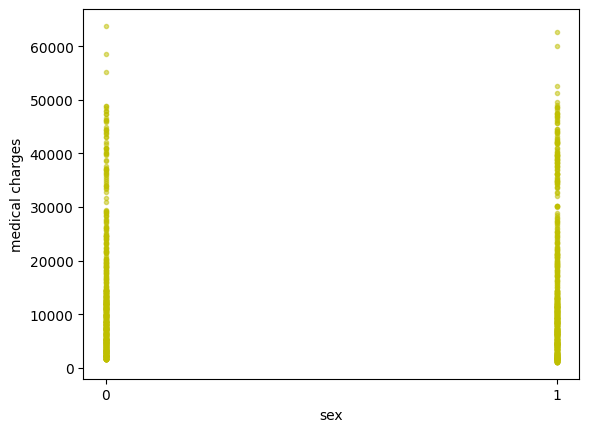

In [11]:
plt.plot(df['sex'],df['charges'],'y.',alpha=0.5)
plt.xticks(np.arange(0, 2, step=1))
plt.xlabel('sex')
plt.ylabel('medical charges')
plt.show()

obviously sex is not an important factor based on the plot above

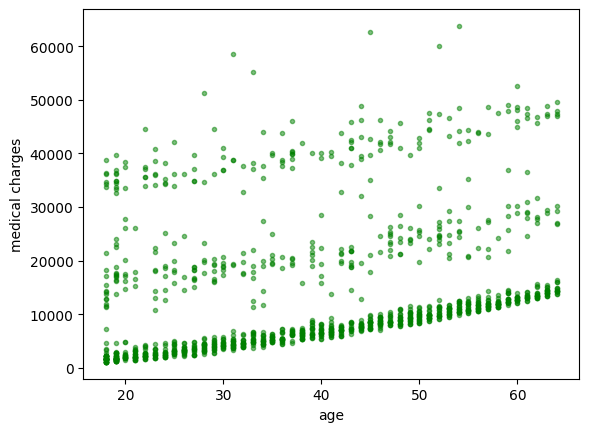

In [12]:
plt.plot(df['age'],df['charges'],'g.',alpha=0.5)
plt.xlabel('age')
plt.ylabel('medical charges')
plt.show()

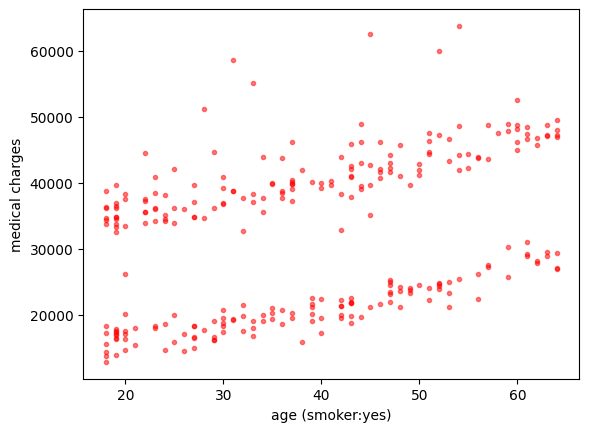

In [13]:
plt.plot(smkrs['age'],smkrs['charges'],'r.', alpha=0.5)
plt.xlabel('age (smoker:yes)')
plt.ylabel('medical charges')
plt.show()

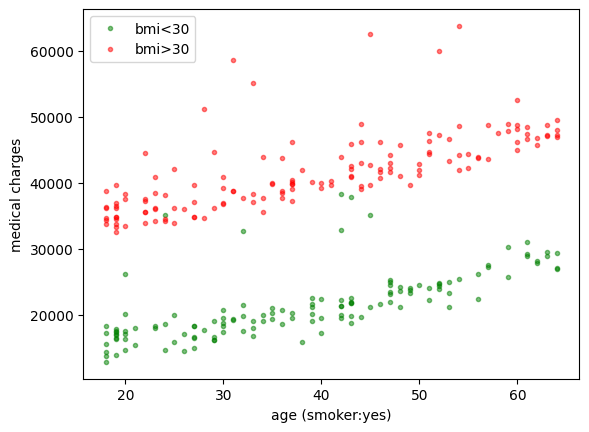

In [14]:
smkrs_good_wght = smkrs[smkrs['bmi']<=30]
smkrs_overwght = smkrs[smkrs['bmi']>30]
plt.plot(smkrs_good_wght['age'],smkrs_good_wght['charges'],'g.',label='bmi<30',alpha=0.5)
plt.plot(smkrs_overwght['age'],smkrs_overwght['charges'],'r.',label='bmi>30',alpha=0.5)
plt.legend(loc='best')
plt.xlabel("age (smoker:yes)")
plt.ylabel("medical charges")
plt.show()

In [15]:
df.corr()

,age,sex,bmi,smoker,charges
age,1.000000,-0.020856,0.109272,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.003750,0.198341
smoker,-0.025019,0.076185,0.003750,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.787251,1.000000


creating Linear model

In [16]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

splitting test and train data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'smoker','bmi']], df[['charges']], test_size=0.2, random_state=6)
print('train: ', len(X_train))
print('test: ', len(X_test))


train:  1070
test:  268


In [18]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
print('coeff: ',regr.coef_)
print('intcpt: ',regr.intercept_)

coeff:  [[  270.71911117 23523.98435647   326.85024793]]
intcpt:  [-12061.96461637]


based on coeff array, being a smoker has the most effect<br>
on your medical charges, so don't smoke pls :)

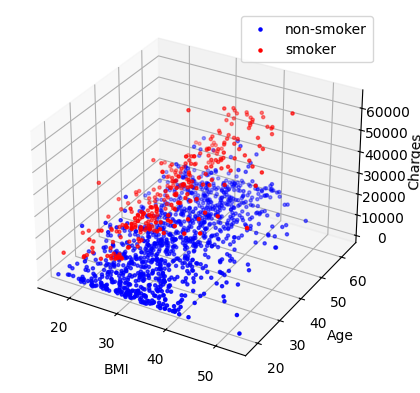

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame containing the columns 'bmi', 'age', and 'charges'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(nonsmkrs['bmi'], nonsmkrs['age'], nonsmkrs['charges'], c='blue', marker='.',label='non-smoker')
ax.scatter(smkrs['bmi'], smkrs['age'], smkrs['charges'], c='red', marker='.', label='smoker')
ax.legend(loc='best')
# Set labels
ax.set_xlabel('BMI')
ax.set_ylabel('Age')
ax.set_zlabel('Charges')

plt.show()

predicting result using the test data

In [20]:
Y_hat = regr.predict(X_test)


calculating r2 score for the model

In [21]:
from sklearn.metrics import r2_score
print('accuracy using r2 score: %.3f' % r2_score(y_test,Y_hat))

accuracy using r2 score: 0.777


In [22]:
# age = int(input('how old are you?'))
# smoke = int(input('do you smoke? (0/1)'))
# bmi = int(input('bmi:'))
# print('predicted medical charge for you: %6.2f' % (regr.coef_[0][0]*age + regr.coef_[0][1]*smoke + regr.coef_[0][2]*bmi + regr.intercept_[0] ))